Wine dataset from scikit learn has been used to learn unsupervised learning

In [31]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [32]:
from sklearn.datasets import load_wine
wine = load_wine()

In [33]:
df = pd.DataFrame(wine.data , columns = wine.feature_names)

In [34]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [35]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [36]:
df.size

2314

In [37]:
print(df.isnull().values.any())

False


In [38]:
#normalizing data
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)  #  df_scaled is a NumPy array
df_scaled = pd.DataFrame(df_scaled_array)


In [39]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [40]:

sse = [] #sum of squared error
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

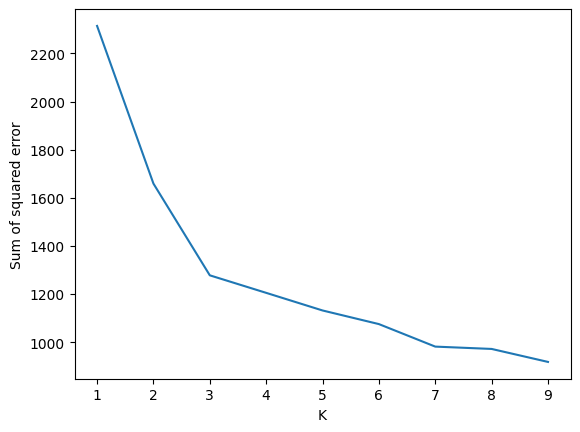

In [41]:
#plotting for elbow method
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

from this plot, it's evident that k = 3

In [42]:
km = KMeans(n_clusters=3, random_state = 42)
#km.fit(df_scaled)
y_km = km.fit_predict(df_scaled)

In [43]:
km.cluster_centers_


array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [44]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [45]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(df_scaled),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [46]:
centers=pca.transform(km.cluster_centers_)
 
# reduced centers
centers

array([[-0.03695661, -1.77223945],
       [-2.72003575,  1.12565126],
       [ 2.2761936 ,  0.93205403]])

In [47]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, y_km)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.2848589191898987


In [48]:
from sklearn.metrics import silhouette_score

# Try different values of k
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    y_km = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, y_km)
    print(f'For k={k}, Silhouette Score: {score}')

For k=2, Silhouette Score: 0.2650328591008738
For k=3, Silhouette Score: 0.2848589191898987
For k=4, Silhouette Score: 0.25422758316007776
For k=5, Silhouette Score: 0.1836210510769814
For k=6, Silhouette Score: 0.16899191019013057
For k=7, Silhouette Score: 0.17260155610949213
For k=8, Silhouette Score: 0.16250411307671145
For k=9, Silhouette Score: 0.17387393345450863


In [49]:
pca_2 = PCA(n_components=10, random_state=42).fit(df_scaled)

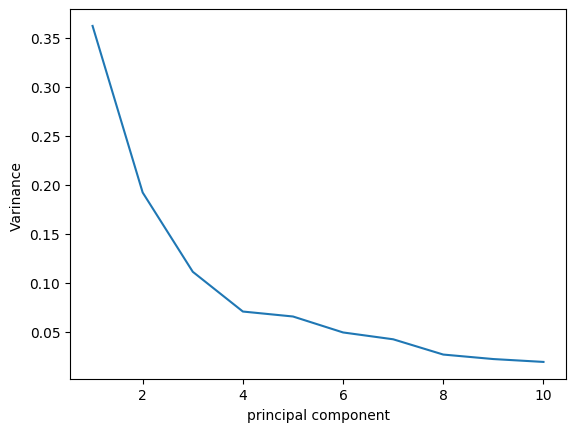

In [50]:
princ_comps_2 = np.arange(pca_2.n_components_, dtype=int) + 1

plt.xlabel('principal component')
plt.ylabel('Varinance ')
plt.plot(princ_comps_2,pca_2.explained_variance_ratio_)

In [51]:
X_red_2 = PCA(n_components=4, random_state=42).fit_transform(df_scaled)
X_red_2 = pd.DataFrame(X_red_2, columns=["pc1", "pc2", "pc3", "pc4"])

X_red_2.head()

,pc1,pc2,pc3,pc4
0,3.316751,1.443463,-0.165739,-0.215631
1,2.209465,-0.333393,-2.026457,-0.291358
2,2.516740,1.031151,0.982819,0.724902
3,3.757066,2.756372,-0.176192,0.567983
4,1.008908,0.869831,2.026688,-0.409766


In [52]:

sse = [] #sum of squared error
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X_red_2)
    sse.append(km.inertia_)

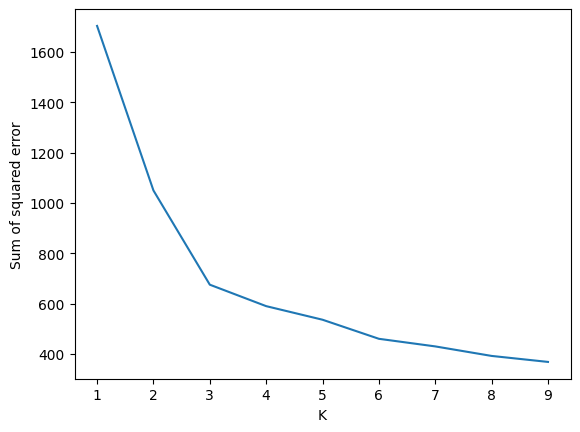

In [53]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [54]:
km2 = KMeans(n_clusters=3, random_state=42)
y_km2 = km2.fit_predict(X_red_2)

In [55]:
score2 = silhouette_score(X_red_2, y_km2)
print(f'Silhouette Score: {score2}')

Silhouette Score: 0.40505685270102937


In [56]:
X_vis = PCA(n_components=2, random_state=42).fit_transform(X_red_2)
X_vis = pd.DataFrame(X_vis, columns=["pc1", "pc2"])

X_vis.head()

,pc1,pc2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


Text(0.5, 1.0, 'Wine Cluster')

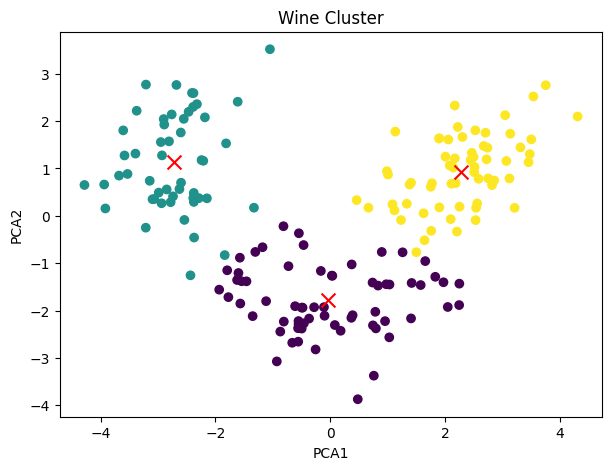

In [57]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(X_vis['pc1'],X_vis['pc2'],c=km2.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')

In [58]:
import umap as up

um = up.UMAP()
X_fit = um.fit(df_scaled)
X_umap = um.transform(df_scaled) 
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])
umap_df.head()

km_umap = KMeans(n_clusters=3, random_state=42)
y_km_umap = km_umap.fit_predict(X_umap)


C:\Users\r0hit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\r0hit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Text(0, 0.5, 'umap component 2')

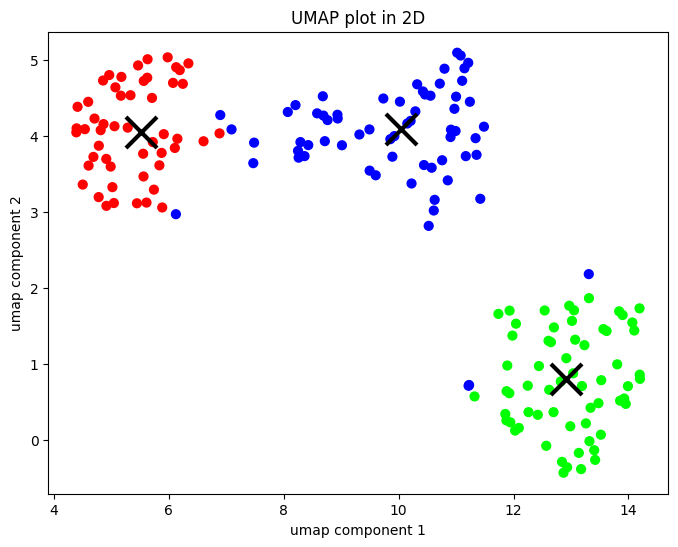

In [59]:
# Figure size
plt.figure(figsize=(8,6))


# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=y_km2, cmap="brg", s=40)

# Centroids
centroids_umap = km_umap.cluster_centers_
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

In [60]:

from sklearn.metrics import silhouette_score

score = silhouette_score(X_umap, y_km_umap)
print("UMAP Silhouette Score:", score)

UMAP Silhouette Score: 0.6735983
